In [1]:
import sys,os, pandas as pd,datetime
from pathlib import Path
project_root = os.path.abspath(Path("../."))
sys.path.append(str(project_root))
print(project_root)
from matplotlib import pyplot as plt
import seaborn as sns
from utils.EDA_utils import (
    prepare_dataframe,
    compute_summary_stats,
    run_adf_kpss,
)

g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis
g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis


In [2]:
# Find the latest processed data file
processed_data_dir = Path(project_root) / "data" / "processed"
processed_files = list(processed_data_dir.glob("gold_price_processed*.csv"))
if not processed_files:
    print("No raw data files found")

latest_file = max(processed_files, key=os.path.getctime)
print(f"Loading processed_file from {latest_file}")

Loading processed_file from g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\data\processed\gold_price_processed.csv


In [3]:
target_isClose=True
load_mt5_data=False
features_file = f"gold_price_features_{'Close' if target_isClose else 'LogReturn'}{'_mt5' if load_mt5_data else ''}.csv"
features_filepath=str(project_root) + f'/data/features/{features_file}'
df = pd.read_csv(features_filepath)
df.describe()


,Volume,day_of_month,year,day_sin,day_cos,day_of_year_norm,dayy_sin,dayy_cos,is_holiday,Log_Return,...,stddev_3_2_short,stddev_3_2_combined,stddev_5_2_long,stddev_5_2_short,stddev_5_2_combined,Open,High,Low,Close,target
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.0,4769.000000,...,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,5033.813378,15.733697,2015.003355,0.361567,-0.093842,0.503345,-0.003514,-0.009845,0.0,0.033101,...,-0.262948,-0.041938,0.216607,-0.262948,-0.046341,1385.619459,1392.702622,1378.186182,1385.525351,1386.390563
std,27064.863297,8.746905,5.468871,0.515672,0.771185,0.286014,0.711917,0.702335,0.0,1.127945,...,0.440281,0.694479,0.411976,0.440281,0.691020,443.522557,445.648991,441.490363,443.631533,444.010100
min,0.000000,1.000000,2006.000000,-0.433884,-0.900969,0.005476,-0.999999,-0.999979,0.0,-9.820579,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,538.000000,539.900024,535.500000,539.000000,539.000000
25%,38.000000,8.000000,2010.000000,0.000000,-0.900969,0.257358,-0.715795,-0.710520,0.0,-0.489420,...,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1148.699951,1155.900024,1138.699951,1148.300049,1150.000000
50%,139.000000,16.000000,2015.000000,0.433884,-0.222521,0.503765,-0.006451,-0.016127,0.0,0.045928,...,0.000000,0.000000,0.000000,0.000000,0.000000,1310.599976,1315.500000,1306.000000,1310.599976,1310.699951
75%,467.000000,23.000000,2020.000000,0.781831,0.623490,0.750171,0.711276,0.687457,0.0,0.626197,...,0.000000,0.000000,0.000000,0.000000,0.000000,1725.500000,1733.900024,1715.699951,1724.800049,1725.099976
max,386334.000000,31.000000,2024.000000,0.974928,1.000000,1.002053,0.999986,0.999991,0.0,8.643166,...,0.000000,1.000000,1.000000,0.000000,1.000000,2787.399902,2789.000000,2774.600098,2788.500000,2788.500000


### 4.5.1	Descriptive Statistics

In [4]:
df  = prepare_dataframe(df)
compute_summary_stats(df)

Summary statistics saved -> g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\results\EDA


,Open,High,Low,Close,Volume,LogReturn
count,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000,4768.000000
mean,1385.794967,1392.879615,1378.360130,1385.700838,5034.869128,0.000329
std,443.403421,445.528067,441.373195,443.512487,27067.603710,0.011280
min,538.000000,539.900024,535.500000,539.000000,0.000000,-0.098206
25%,1149.525024,1156.725006,1139.074951,1148.825012,38.000000,-0.004899
50%,1310.649963,1315.549988,1306.049988,1310.649963,139.000000,0.000458
75%,1725.524994,1733.925018,1715.899963,1724.825043,467.000000,0.006259
max,2787.399902,2789.000000,2774.600098,2788.500000,386334.000000,0.086432
skew,0.331527,0.330956,0.334401,0.332617,7.145038,-0.339844
kurtosis,0.052077,0.049301,0.053611,0.052393,56.755683,5.436894


### 4.5.2	Univariate Distribution Analysis of Prices & Log Returns

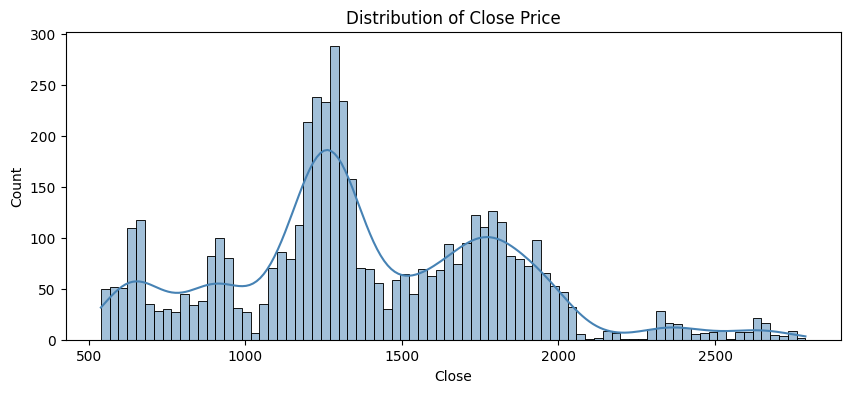

In [5]:
plt.figure(figsize=(10,4))
sns.histplot(df['Close'], bins=80, kde=True, color='steelblue')
plt.title("Distribution of Close Price")
plt.show()

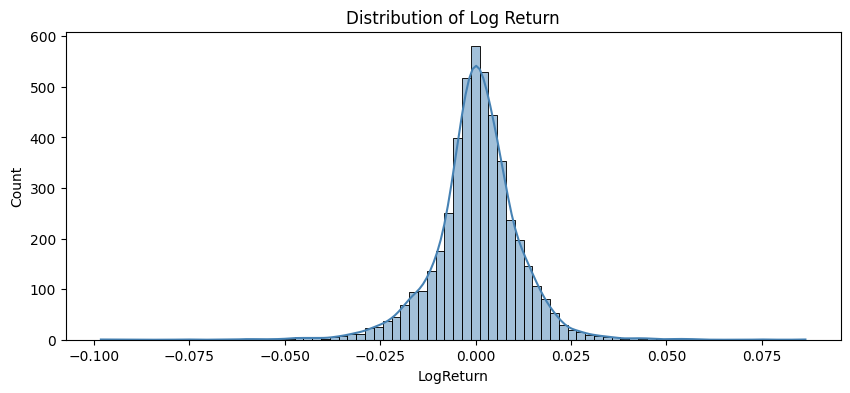

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(df['LogReturn'], bins=80, kde=True, color='steelblue')
plt.title("Distribution of Log Return")
plt.show()

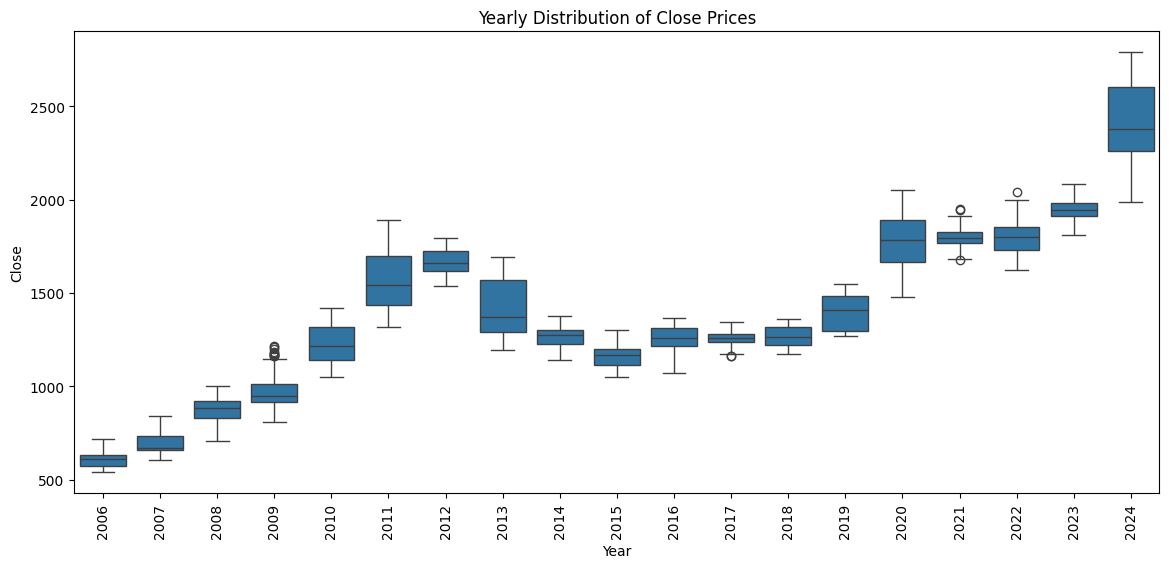

In [7]:

df['Year'] = df.index.year

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Year', y='Close')
plt.xticks(rotation=90)
plt.title("Yearly Distribution of Close Prices")
plt.show()


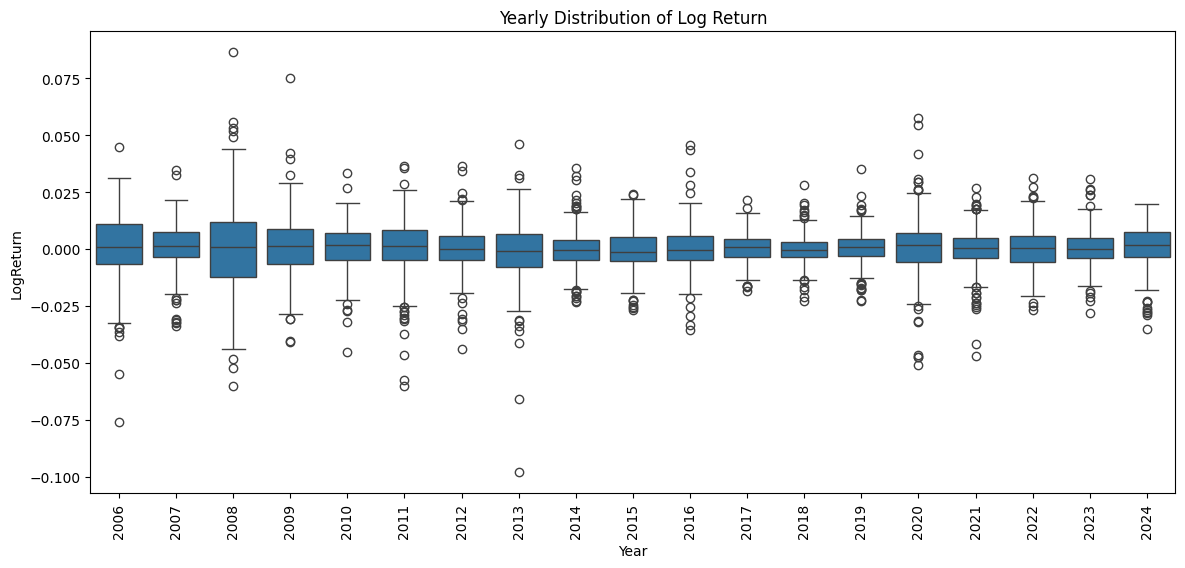

In [8]:
df['Year'] = df.index.year

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Year', y='LogReturn')
plt.xticks(rotation=90)
plt.title("Yearly Distribution of Log Return")
plt.show()

### 4.5.3	Autocorrelation and Partial Autocorrelation Analysis

<Figure size 1200x500 with 0 Axes>

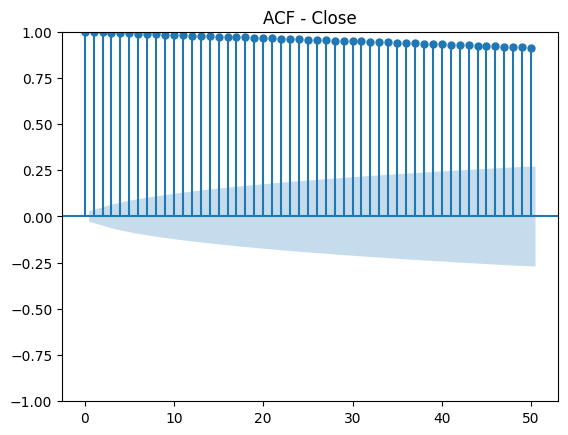

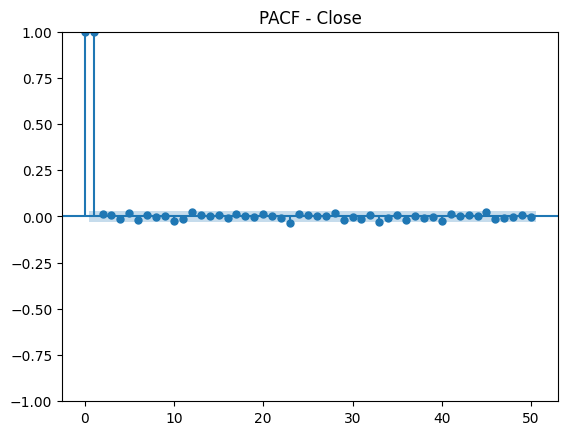

<Figure size 1200x500 with 0 Axes>

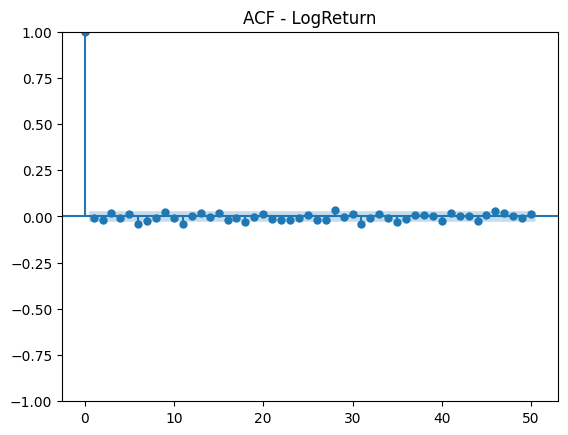

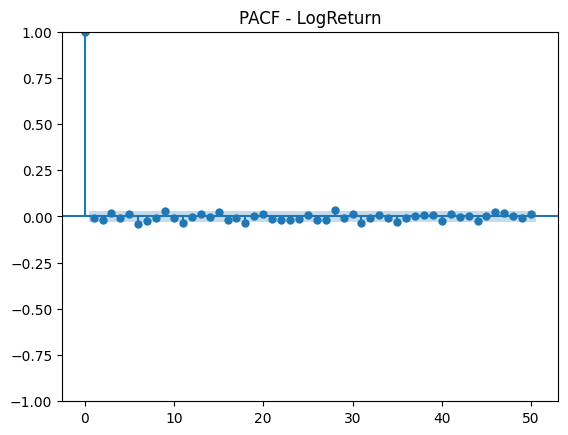

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lags = 50

plt.figure(figsize=(12,5))
plot_acf(df['Close'], lags=lags)
plt.title(f"ACF - Close")
plt.show()

plot_pacf(df['Close'], lags=lags)
plt.title(f"PACF - Close")
plt.show()

plt.figure(figsize=(12,5))
plot_acf(df['LogReturn'], lags=lags)
plt.title(f"ACF - LogReturn")
plt.show()

plot_pacf(df['LogReturn'], lags=lags)
plt.title(f"PACF - LogReturn")
plt.show()

### 4.5.4	Stationarity Tests (ADF, KPSS)

In [10]:
run_adf_kpss(df)

Stationarity results saved -> g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\results\EDA /tables/stationarity_results.csv


g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\utils\EDA_utils.py:94: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(series, regression=regression, nlags="auto")
g:\My Drive\0Study_programs\1Msc_ML_AI\EAF_python_project\EAF_implementation_thesis\utils\EDA_utils.py:94: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, lags, crit = kpss(series, regression=regression, nlags="auto")


{'Close_ADF': {'adf_stat': -1.1747554182527784,
  'p_value': 0.9155488891982386,
  'n_lags': 11,
  'n_obs': 4756,
  'crit_1%': -3.9606747693908275,
  'crit_5%': -3.4114135285790286,
  'crit_10%': -3.1275938238567598},
 'Close_KPSS': {'kpss_stat': 1.0151351831152586,
  'p_value': 0.01,
  'n_lags': 42,
  'crit_10%': 0.119,
  'crit_5%': 0.146,
  'crit_1%': 0.216},
 'LogReturn_ADF': {'adf_stat': -22.049576155859455,
  'p_value': 0.0,
  'n_lags': 10,
  'n_obs': 4757,
  'crit_1%': -3.431725411436783,
  'crit_5%': -2.8621477762930767,
  'crit_10%': -2.5670935212314934},
 'LogReturn_KPSS': {'kpss_stat': 0.13084974667705404,
  'p_value': 0.1,
  'n_lags': 11,
  'crit_10%': 0.347,
  'crit_5%': 0.463,
  'crit_1%': 0.739}}

### 4.5.5	Correlation Analysis

In [11]:
numeric_cols = ['Open','High','Low','Close','Volume','LogReturn']
corr = df[numeric_cols].corr()
corr

,Open,High,Low,Close,Volume,LogReturn
Open,1.000000,0.999795,0.999711,0.999565,0.002436,-0.010738
High,0.999795,1.000000,0.999615,0.999757,0.000950,-0.000229
Low,0.999711,0.999615,1.000000,0.999813,0.003558,0.003202
Close,0.999565,0.999757,0.999813,1.000000,0.002045,0.012689
Volume,0.002436,0.000950,0.003558,0.002045,1.000000,-0.023317
LogReturn,-0.010738,-0.000229,0.003202,0.012689,-0.023317,1.000000
